# Case Study: Covid-19 in Australia, and the Myths and Realities of Exponential Growth

New concepts

* Introducing time-series data
* Using GroupBy to group data
* Growth rates
* Curve fitting

Reinforced concepts

* File IO
* File formats
* Data selection and manipulation with pandas (and friends)
* Plotting data with pyplot

## Finding a Reliable Covid-19 Data Source

There are many possible sources of data (of varying quality and veracity). We always look for a trusted source of data, such as the World Health Organisation (WHO).

Academics from John Hopkins University have done a great job of collecting data from reliable sources (including WHO) and making it publicly available as a "[dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)". Note that the data sources (as well as a short article in the Journal [_Lancet_](https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub) are provided at the bottom of the page.

The authors also provide a link to the data sources on [Github](https://github.com/CSSEGISandData/COVID-19). The data is shared and downloadable.

(This is an example of best practice in sharing and documenting data for the common good!)

### A first look at the data

The package downloaded from Github contains the following files:

```
datapackage.json
process.py
README.md
time-series-19-covid-combined.csv
```

> _Q: What types are they and what do you anticipate they will contain?_

Lets look at them in a terminal and see if we're right &rarr;

Jupyter Lab can handle all of these file types, so lets take a closer look using Jupyter Lab &rarr;

Lets use some of our skills learnt so far to read in the data, inspect it more closely, and extract the data we're interested in.

## Data Extraction

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
COVID_DATA="Data/2020-03-17-time-series-19-covid-combined.csv"
data = pd.read_csv(COVID_DATA)
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0,2020-01-22,2,0,0
1,NaN,Thailand,15.0000,101.0,2020-01-23,3,0,0
2,NaN,Thailand,15.0000,101.0,2020-01-24,5,0,0
3,NaN,Thailand,15.0000,101.0,2020-01-25,7,0,0
4,NaN,Thailand,15.0000,101.0,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25755,NaN,The Gambia,13.4667,-16.6,2020-03-13,0,0,0
25756,NaN,The Gambia,13.4667,-16.6,2020-03-14,0,0,0
25757,NaN,The Gambia,13.4667,-16.6,2020-03-15,0,0,0
25758,NaN,The Gambia,13.4667,-16.6,2020-03-16,0,0,0


In [228]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Recovered           int64
Deaths              int64
dtype: object

In [229]:
for datum in data.iloc[1]:
    print(type(datum))

<class 'float'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [230]:
for datum in data.iloc[25464]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


> _Q: How successful has pandas been at inferring data types?_

> _What types would you choose?_

Lets try again. Starting with the province:

In [231]:
data = pd.read_csv(COVID_DATA, na_filter=False)
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,,Thailand,15.0000,101.0,2020-01-22,2,0,0
1,,Thailand,15.0000,101.0,2020-01-23,3,0,0
2,,Thailand,15.0000,101.0,2020-01-24,5,0,0
3,,Thailand,15.0000,101.0,2020-01-25,7,0,0
4,,Thailand,15.0000,101.0,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25755,,The Gambia,13.4667,-16.6,2020-03-13,0,0,0
25756,,The Gambia,13.4667,-16.6,2020-03-14,0,0,0
25757,,The Gambia,13.4667,-16.6,2020-03-15,0,0,0
25758,,The Gambia,13.4667,-16.6,2020-03-16,0,0,0


In [232]:
for datum in data.iloc[1]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


What about the Date column?

> _Q: Why is storing date and time information as strings not particularly useful?_



### Introducing time-series data

The Date is provided in [ISO 801 format](https://www.iso.org/iso-8601-date-and-time-format.html). Why is this a good format to use?

We could parse the Date string to get out the year, month and day ourselves, but we don't need to.

Pandas is able to parse it, recognise the format, and convert it to its own ("native") timestamp format:

In [235]:
data = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,,Thailand,15.0000,101.0,2020-01-22,2,0,0
1,,Thailand,15.0000,101.0,2020-01-23,3,0,0
2,,Thailand,15.0000,101.0,2020-01-24,5,0,0
3,,Thailand,15.0000,101.0,2020-01-25,7,0,0
4,,Thailand,15.0000,101.0,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25755,,The Gambia,13.4667,-16.6,2020-03-13,0,0,0
25756,,The Gambia,13.4667,-16.6,2020-03-14,0,0,0
25757,,The Gambia,13.4667,-16.6,2020-03-15,0,0,0
25758,,The Gambia,13.4667,-16.6,2020-03-16,0,0,0


In [236]:
for datum in data.iloc[1]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [237]:
data.at[0,"Date"]

Timestamp('2020-01-22 00:00:00')

Lets have a look at the documentation for pandas [Timestamp](https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.Timestamp.html?highlight=timestamp) &rarr;

Note that in the absence of a time, pandas has put in a default time. There are many ways we can retrieve just the date information:

In [238]:
now = pd.Timestamp.now()
now

Timestamp('2020-03-19 11:47:36.808595')

In [239]:
print(now.day, now.month_name(), now.year)

19 March 2020


In [240]:
now.date()

datetime.date(2020, 3, 19)

### Extracting the Australian data

Let's start with some more practical names:

In [242]:
covid = pd.read_csv(COVID_DATA, na_filter=False, parse_dates=["Date"])
covid.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
             inplace=True)
covid.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
0,,Thailand,15.0,101.0,2020-01-22,2,0,0
1,,Thailand,15.0,101.0,2020-01-23,3,0,0
2,,Thailand,15.0,101.0,2020-01-24,5,0,0
3,,Thailand,15.0,101.0,2020-01-25,7,0,0
4,,Thailand,15.0,101.0,2020-01-26,8,2,0


In [243]:
auscovid = covid.loc[covid["Country"] == "Australia"]
auscovid

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
336,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
337,New South Wales,Australia,-33.8688,151.2093,2020-01-23,0,0,0
338,New South Wales,Australia,-33.8688,151.2093,2020-01-24,0,0,0
339,New South Wales,Australia,-33.8688,151.2093,2020-01-25,0,0,0
340,New South Wales,Australia,-33.8688,151.2093,2020-01-26,3,0,0
...,...,...,...,...,...,...,...,...
22563,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-13,1,0,0
22564,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-14,1,0,0
22565,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-15,1,0,0
22566,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-16,2,0,0


## Data Exploration using Bar Plots

In [244]:
auscovid.nlargest(1,"Confirmed")

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
391,New South Wales,Australia,-33.8688,151.2093,2020-03-17,210,4,4


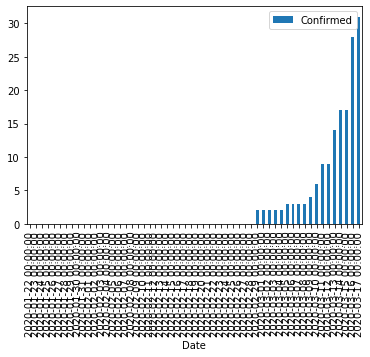

In [245]:
auscovid.loc[auscovid["State"] == "Western Australia"].plot.bar("Date","Confirmed")

In [246]:
WA = auscovid.loc[(auscovid["State"] == "Western Australia") & (auscovid["Confirmed"]>0)]
WA.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
2782,Western Australia,Australia,-31.9505,115.8605,2020-02-29,2,0,0
2783,Western Australia,Australia,-31.9505,115.8605,2020-03-01,2,0,1
2784,Western Australia,Australia,-31.9505,115.8605,2020-03-02,2,0,1
2785,Western Australia,Australia,-31.9505,115.8605,2020-03-03,2,0,1
2786,Western Australia,Australia,-31.9505,115.8605,2020-03-04,2,0,1


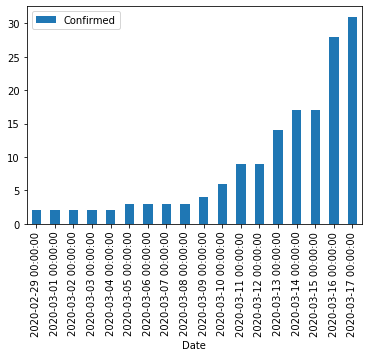

In [247]:
ax = WA.plot.bar("Date","Confirmed")
plt.show()

The date labels are not very readable. Rather than create our own strings 'manually', we can used `strftime` (STRing Format TIME"?)

Some python documentation is not very useful! https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html#pandas.Timestamp.strftime

Although we haven't used the `datetime` module, pandas Timestamp is designed to be compatible, and we can [find some documentation there](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

In [248]:
WA["Date"].apply(lambda x: x.strftime("%B %d"))

2782    February 29
2783       March 01
2784       March 02
2785       March 03
2786       March 04
2787       March 05
2788       March 06
2789       March 07
2790       March 08
2791       March 09
2792       March 10
2793       March 11
2794       March 12
2795       March 13
2796       March 14
2797       March 15
2798       March 16
2799       March 17
Name: Date, dtype: object

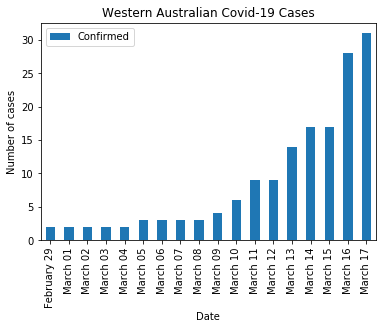

In [249]:
ax = WA.plot.bar("Date","Confirmed")
xlabels = WA["Date"].apply(lambda x: x.strftime("%B %d"))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("Western Australian Covid-19 Cases")
plt.show()

We are also interested in the number of recoveries. We could plot those separately, but by plotting them together, we can get an idea of the _proportion_ of recoveries so far.

Without arguments, Dataframe's plot function will try to plot all columns on the same graph:

In [274]:
ax = WA.plot.bar()
plt.show()

ValueError: view limit minimum -36908.598025 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

To overcome this problem, we'll create a temporary dataframe by filtering out just those (numerical) columns that we want:

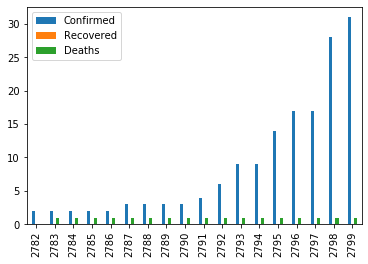

In [276]:
numbers = WA.filter(["Confirmed", "Recovered", "Deaths"])
ax = numbers.plot.bar()
plt.show()

Let's try a different start with more data.

In [250]:
NSW = auscovid.loc[(auscovid["State"] == "New South Wales") & (auscovid["Confirmed"]>0)]
NSW.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
340,New South Wales,Australia,-33.8688,151.2093,2020-01-26,3,0,0
341,New South Wales,Australia,-33.8688,151.2093,2020-01-27,4,0,0
342,New South Wales,Australia,-33.8688,151.2093,2020-01-28,4,0,0
343,New South Wales,Australia,-33.8688,151.2093,2020-01-29,4,0,0
344,New South Wales,Australia,-33.8688,151.2093,2020-01-30,4,2,0


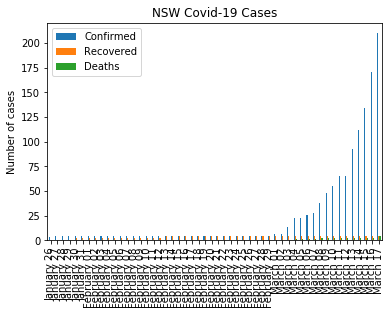

In [251]:
numbers = NSW.filter(["Confirmed", "Recovered", "Deaths"])
ax = numbers.plot.bar()
xlabels = NSW["Date"].apply(lambda x: x.strftime("%B %d"))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases")
plt.show()

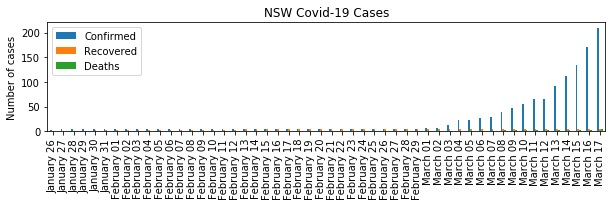

In [252]:
ax = numbers.plot.bar(figsize=(10,2))
ax.set_xticklabels(xlabels)
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases")
plt.show()

It's getting to crowded to show by day. We could try showing by week.

Let's use a list comprehension to get the day names and pick out the sundays:

In [253]:
[x.day_name() for x in NSW["Date"]][0:8]

['Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday']

In [254]:
[x.day_name() == 'Sunday' for x in NSW["Date"]][0:10]

[True, False, False, False, False, False, False, True, False, False]

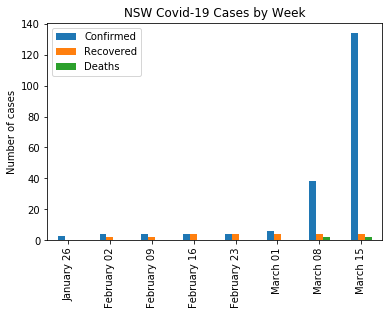

In [255]:
NSW_sundays = NSW.loc[[x.day_name() == 'Sunday' for x in NSW["Date"]]]
numbers = NSW_sundays.filter(["Confirmed", "Recovered", "Deaths"])
ax = numbers.plot.bar(figsize=(6,4))
ax.set_xticklabels(NSW_sundays["Date"].apply(lambda x: x.strftime("%B %d")))
plt.ylabel("Number of cases")
plt.title("NSW Covid-19 Cases by Week")
plt.show()

Rather than "manually" coding for each state, we would like an efficient way to look at them all. 

Pandas provides a very useful class for just this kind of problem. It's called `GroupBy'.

--- Use groupby date to get all Australian cases?
 
 note some are 'from Diamond Princess'

## Using GroupBy

In [443]:
states = auscovid.groupby("State")
states

In [444]:
states.head(2)

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
336,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
337,New South Wales,Australia,-33.8688,151.2093,2020-01-23,0,0,0
392,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0
393,Victoria,Australia,-37.8136,144.9631,2020-01-23,0,0,0
448,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
449,Queensland,Australia,-28.0167,153.4000,2020-01-23,0,0,0
1064,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0
1065,South Australia,Australia,-34.9285,138.6007,2020-01-23,0,0,0
1232,From Diamond Princess,Australia,35.4437,139.6380,2020-01-22,0,0,0
1233,From Diamond Princess,Australia,35.4437,139.6380,2020-01-23,0,0,0


In [445]:
states.max()

,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
State,,,,,,,
Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-17,2,0,0
From Diamond Princess,Australia,35.4437,139.6380,2020-03-17,8,0,0
New South Wales,Australia,-33.8688,151.2093,2020-03-17,210,4,4
Northern Territory,Australia,-12.4634,130.8456,2020-03-17,1,0,0
Queensland,Australia,-28.0167,153.4000,2020-03-17,78,8,0
South Australia,Australia,-34.9285,138.6007,2020-03-17,29,3,0
Tasmania,Australia,-41.4545,145.9707,2020-03-17,7,0,0
Victoria,Australia,-37.8136,144.9631,2020-03-17,94,8,0
Western Australia,Australia,-31.9505,115.8605,2020-03-17,31,0,1


(Note that max works on dates too!)

Many GroupBy methods, like `head` and `max`, themselves return dataframes.

But what's inside a GroupBy object? `groups` gives us a dictionary view of the object:

In [446]:
states.groups

{'Australian Capital Territory': Int64Index([22512, 22513, 22514, 22515, 22516, 22517, 22518, 22519, 22520,
             22521, 22522, 22523, 22524, 22525, 22526, 22527, 22528, 22529,
             22530, 22531, 22532, 22533, 22534, 22535, 22536, 22537, 22538,
             22539, 22540, 22541, 22542, 22543, 22544, 22545, 22546, 22547,
             22548, 22549, 22550, 22551, 22552, 22553, 22554, 22555, 22556,
             22557, 22558, 22559, 22560, 22561, 22562, 22563, 22564, 22565,
             22566, 22567],
            dtype='int64'),
 'From Diamond Princess': Int64Index([1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242,
             1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,
             1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264,
             1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275,
             1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286,
             1287],
            dtyp

It maps keys to an index (Int64Index) object.

In [447]:
states.groups.keys()

dict_keys(['Australian Capital Territory', 'From Diamond Princess', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia'])

But we rarely need to dig into that level of detail. Methods are provided to access the data (often as dataframes).

In [448]:
states.get_group("Tasmania").tail(3)

,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
3469,Australia,-41.4545,145.9707,2020-03-15,6,0,0
3470,Australia,-41.4545,145.9707,2020-03-16,7,0,0
3471,Australia,-41.4545,145.9707,2020-03-17,7,0,0


So how should we plot the data for each state (without naming them individually)?

There are many possibilities. We could use an iterator to get a table for each state, and define a function to produce a plot from that table.

In [451]:
for name, group in states:
    print(name)
    print(group.head(3),"\n")   

Australian Capital Territory
                              State    Country      Lat      Long       Date  \
22512  Australian Capital Territory  Australia -35.4735  149.0124 2020-01-22   
22513  Australian Capital Territory  Australia -35.4735  149.0124 2020-01-23   
22514  Australian Capital Territory  Australia -35.4735  149.0124 2020-01-24   

       Confirmed  Recovered  Deaths  
22512          0          0       0  
22513          0          0       0  
22514          0          0       0   

From Diamond Princess
                      State    Country      Lat     Long       Date  \
1232  From Diamond Princess  Australia  35.4437  139.638 2020-01-22   
1233  From Diamond Princess  Australia  35.4437  139.638 2020-01-23   
1234  From Diamond Princess  Australia  35.4437  139.638 2020-01-24   

      Confirmed  Recovered  Deaths  
1232          0          0       0  
1233          0          0       0  
1234          0          0       0   

New South Wales
               State   

In [452]:
def weekly_barplot (state, statedata):
    sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]
    numbers = sundays.filter(["Confirmed", "Recovered", "Deaths"])
    ax = numbers.plot.bar(figsize=(3,2))
    ax.set_xticklabels(sundays["Date"].apply(lambda x: x.strftime("%B %d")))
    plt.ylabel("Number of cases")
    plt.title(state + " Covid-19 Cases by Week")
    plt.show()

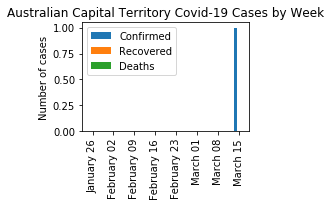

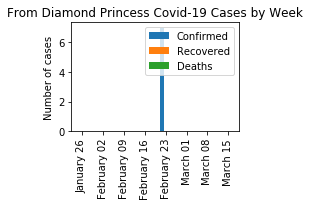

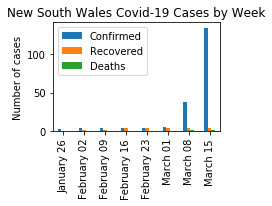

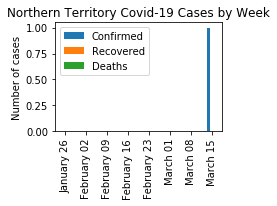

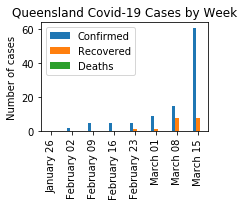

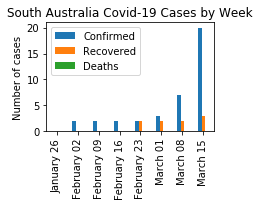

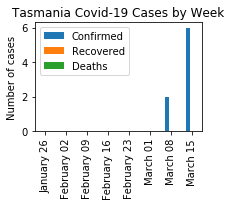

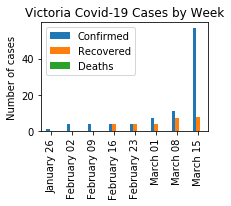

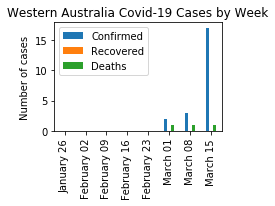

In [454]:
for name, group in states:
    weekly_barplot(name, group)

Alternatively we can use `apply` to apply a function to the whole GroupBy object, one dataframe at a time.

Unfortunately its a little messy:
* We need the function to access the state name, but GroupBy by default strips this out and uses it as an index to the rest of the data.
* Apply only applies to the remaining data.
* You could be mistaken for thinking this is not the case, since some methods, like `head`, `max` above, print the index value as if it were the "State" field.
* Note that `get_group`, however, does not!

Yuck.

However there is a fix. Setting `as_index` to false maintains the column (in an 'SQL-style' output). Counterintuitively it _does_ still use the column as the index (

In [433]:
def weekly_barplot2 (statedata):
    print(statedata.index)
#    state = statedata["State"].iat[0]
    sundays = statedata.loc[[x.day_name() == 'Sunday' for x in statedata["Date"]]]
    numbers = sundays.filter(["Confirmed", "Recovered", "Deaths"])
    ax = numbers.plot.bar(figsize=(3,2))
    ax.set_xticklabels(sundays["Date"].apply(lambda x: x.strftime("%B %d")))
    plt.ylabel("Number of cases")
    plt.title(state + " Covid-19 Cases by Week")
    plt.show()

Int64Index([22512, 22513, 22514, 22515, 22516, 22517, 22518, 22519, 22520,
            22521, 22522, 22523, 22524, 22525, 22526, 22527, 22528, 22529,
            22530, 22531, 22532, 22533, 22534, 22535, 22536, 22537, 22538,
            22539, 22540, 22541, 22542, 22543, 22544, 22545, 22546, 22547,
            22548, 22549, 22550, 22551, 22552, 22553, 22554, 22555, 22556,
            22557, 22558, 22559, 22560, 22561, 22562, 22563, 22564, 22565,
            22566, 22567],
           dtype='int64')


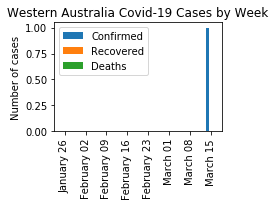

Int64Index([1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242,
            1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,
            1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264,
            1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275,
            1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286,
            1287],
           dtype='int64')


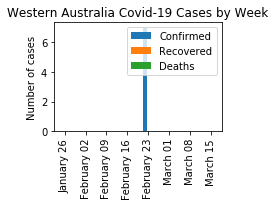

Int64Index([336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
            349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
            362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
            375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
            388, 389, 390, 391],
           dtype='int64')


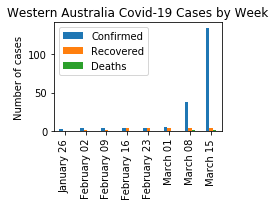

Int64Index([3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986,
            3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997,
            3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008,
            4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019,
            4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030,
            4031],
           dtype='int64')


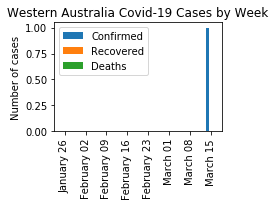

Int64Index([448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
            461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473,
            474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
            487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,
            500, 501, 502, 503],
           dtype='int64')


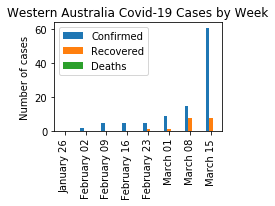

Int64Index([1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
            1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085,
            1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096,
            1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107,
            1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
            1119],
           dtype='int64')


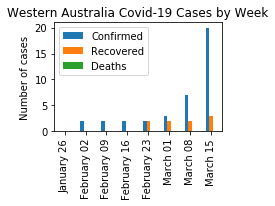

Int64Index([3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426,
            3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437,
            3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448,
            3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459,
            3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470,
            3471],
           dtype='int64')


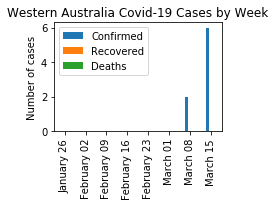

Int64Index([392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
            405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
            418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
            431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
            444, 445, 446, 447],
           dtype='int64')


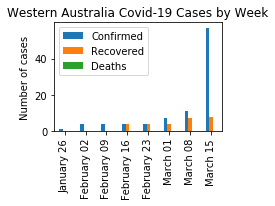

Int64Index([2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754,
            2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765,
            2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
            2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787,
            2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798,
            2799],
           dtype='int64')


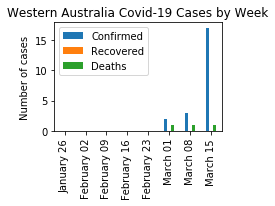

""


In [434]:
states.apply(weekly_barplot2)

In [283]:
states.head(2)

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
336,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
337,New South Wales,Australia,-33.8688,151.2093,2020-01-23,0,0,0
392,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0
393,Victoria,Australia,-37.8136,144.9631,2020-01-23,0,0,0
448,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
449,Queensland,Australia,-28.0167,153.4000,2020-01-23,0,0,0
1064,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0
1065,South Australia,Australia,-34.9285,138.6007,2020-01-23,0,0,0
1232,From Diamond Princess,Australia,35.4437,139.6380,2020-01-22,0,0,0
1233,From Diamond Princess,Australia,35.4437,139.6380,2020-01-23,0,0,0


## Curve Fitting and Optimisation

Are WA's infections really increasing exponentially? 

Don't believe the press! Let's find out for ourselves.

In [256]:
WA.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
2782,Western Australia,Australia,-31.9505,115.8605,2020-02-29,2,0,0
2783,Western Australia,Australia,-31.9505,115.8605,2020-03-01,2,0,1
2784,Western Australia,Australia,-31.9505,115.8605,2020-03-02,2,0,1
2785,Western Australia,Australia,-31.9505,115.8605,2020-03-03,2,0,1
2786,Western Australia,Australia,-31.9505,115.8605,2020-03-04,2,0,1


In [257]:
len(WA)

18

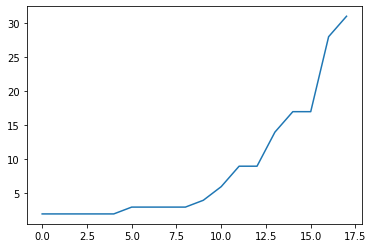

In [258]:
plt.plot(np.arange(len(WA)),WA["Confirmed"])
plt.show()

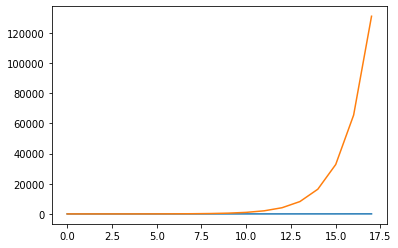

In [259]:
xs = np.arange(len(WA))
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)
plt.plot(xs, guesses)
plt.show()

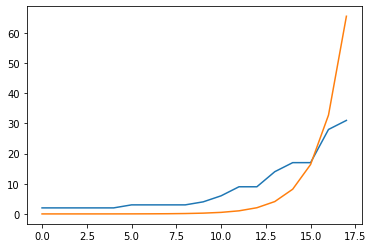

In [260]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)/2000
plt.plot(xs, guesses)
plt.show()

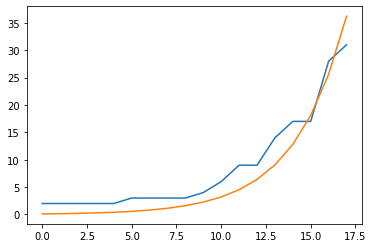

In [261]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

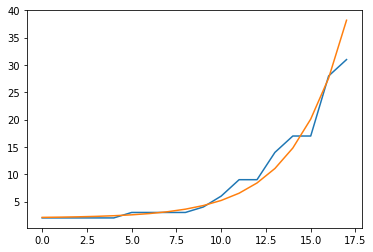

In [262]:
plt.plot(xs,WA["Confirmed"])
guesses = 2 + np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

Pretty close!!

But lets get the computer to do the work of finding the best match.

First, we need to decide what form the function we want try and match to the data will take, and what _parameters_ we will vary.

We'll define a function of the form `a + b * 2^(cx)`.
As demonstrated above:
* `a` "shifts" the function in the y direction
* `b` "scales" (stretches or shrinks) the function
* `c` determines the "steepness" of the function


In [263]:
def my_exp (x, a, b, c):
    return (a + b * np.exp2(x/c))

In [264]:
from scipy.optimize import curve_fit

In [265]:
curve_fit(my_exp, xs, WA["Confirmed"])

(array([0.96443126, 0.44830302, 2.7775963 ]),
 array([[ 0.49742473, -0.10159408, -0.14297361],
        [-0.10159408,  0.0300713 ,  0.04393354],
        [-0.14297361,  0.04393354,  0.06475807]]))

Lets capture the parameters. 

Remember our guesses were 2, 0.1, and 0.5. How did we compare?

In [266]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])
(a, b, c)

(0.9644312645326995, 0.4483030219843088, 2.7775963004609503)

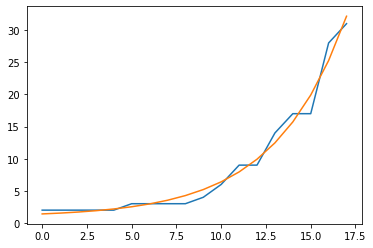

In [267]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])

plt.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
plt.plot(xs, optimised_guesses)
plt.show()

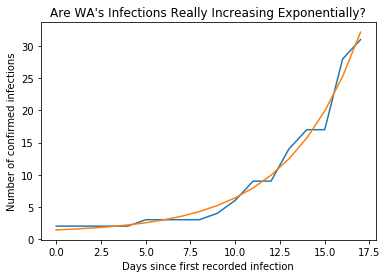

In [268]:
plt.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since first recorded infection")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

For completeness, lets include all the data (the exponential function tends to zero as x tends to minus infinity, so we don't expect the fit to change much).

In [269]:
WA_all = auscovid.loc[(auscovid["State"] == "Western Australia")]
WA_all.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
2744,Western Australia,Australia,-31.9505,115.8605,2020-01-22,0,0,0
2745,Western Australia,Australia,-31.9505,115.8605,2020-01-23,0,0,0
2746,Western Australia,Australia,-31.9505,115.8605,2020-01-24,0,0,0
2747,Western Australia,Australia,-31.9505,115.8605,2020-01-25,0,0,0
2748,Western Australia,Australia,-31.9505,115.8605,2020-01-26,0,0,0


Parameters: 0.023998772890042146 0.00011376652513021524 3.0404404012531527


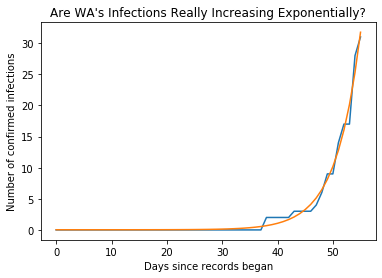

In [270]:
xs = np.arange(len(WA_all))
((a, b, c), covariance) = curve_fit(my_exp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

Notice that by starting at zero, the "vertical shift" of the first parameter is not really needed. 

Lets see if we can remove the first parameter and still get a good fit.

In [271]:
def my_zexp (x, b, c):
    return (b * np.exp2(x/c))

Parameters: 0.00011785050010056821 3.0489545606240402


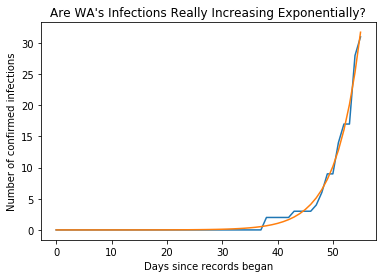

In [272]:
((b, c), covariance) = curve_fit(my_zexp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

We also call these parameters _independent variables_ (we can set them independently of each other) and we call the number of independent variables the _degrees of freedom_.

`my_exp` has 3 degrees of freedom, while `my_zexp` has only 2 degrees of freedom.

Generally we like to use as _few degrees of freedom as we can_ to fit the data, so that we can understand the general trend of the data.

Fitting a function with too many degrees of freedom often results in _over-fitting_, and describes the (random) variability in the data rather than the general trend.

You will meet these concepts again in the __Statistical Learning__ unit!

## GroupBy

In [107]:
WA.head()

,State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
2733,Western Australia,Australia,-31.9505,115.8605,2020-02-29,2,0,0
2734,Western Australia,Australia,-31.9505,115.8605,2020-03-01,2,0,1
2735,Western Australia,Australia,-31.9505,115.8605,2020-03-02,2,0,1
2736,Western Australia,Australia,-31.9505,115.8605,2020-03-03,2,0,1
2737,Western Australia,Australia,-31.9505,115.8605,2020-03-04,2,0,1


In [49]:
import json
with open("datapackage.json",'r') as file:
    di = json.load(file)
di

{'bytes': 1290603,
 'count_of_rows': 25465,
 'hash': 'aab64b8efa66b335e9b20741496719c7',
 'profile': 'data-package',
 'resources': [{'bytes': 1290603,
   'dialect': {'caseSensitiveHeader': False,
    'delimiter': ',',
    'doubleQuote': True,
    'header': True,
    'lineTerminator': '\r\n',
    'quoteChar': '"',
    'skipInitialSpace': False},
   'encoding': 'utf-8',
   'format': 'csv',
   'hash': '477849f81814c03aee1eea31b01741a7',
   'name': 'time-series-19-covid-combined',
   'path': 'time-series-19-covid-combined.csv',
   'profile': 'tabular-data-resource',
   'schema': {'fields': [{'format': 'default',
      'name': 'Province/State',
      'type': 'string'},
     {'format': 'default', 'name': 'Country/Region', 'type': 'string'},
     {'decimalChar': '.',
      'format': 'default',
      'groupChar': '',
      'name': 'Lat',
      'type': 'number'},
     {'decimalChar': '.',
      'format': 'default',
      'groupChar': '',
      'name': 'Long',
      'type': 'number'},
     {'for

In [51]:
data = pd.read_csv("time-series-19-covid-combined.csv", converters=di)
data


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Thailand,15.0000,101.0000,2020-01-23,3,0,0
2,NaN,Thailand,15.0000,101.0000,2020-01-24,5,0,0
3,NaN,Thailand,15.0000,101.0000,2020-01-25,7,0,0
4,NaN,Thailand,15.0000,101.0000,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25460,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-12,0,0,0
25461,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-13,1,0,0
25462,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-14,1,0,0
25463,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-15,1,0,0


In [52]:
for datum in data.iloc[1]:
    print(type(datum))

<class 'float'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [53]:
import datapackage


ModuleNotFoundError: No module named 'datapackage'

In [48]:
j = pd.read_json("datapackage.json")
j.head()

,bytes,count_of_rows,hash,profile,resources
0,1290603,25465,aab64b8efa66b335e9b20741496719c7,data-package,"{'bytes': 1290603, 'dialect': {'caseSensitiveH..."


In [22]:
mytypes = {"Province/State": str, "Country/Region": str,
           "Lat": np.float64, "Long": np.float64,
           "Date": str, 
           "Confirmed": np.int64, "Recovered": np.int64, "Deaths": np.int64}
data = pd.read_csv("time-series-19-covid-combined.csv", dtype=mytypes, na_filter=False)
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,,Thailand,15.0000,101.0000,2020-01-23,3,0,0
2,,Thailand,15.0000,101.0000,2020-01-24,5,0,0
3,,Thailand,15.0000,101.0000,2020-01-25,7,0,0
4,,Thailand,15.0000,101.0000,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25460,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-12,0,0,0
25461,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-13,1,0,0
25462,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-14,1,0,0
25463,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-15,1,0,0


In [23]:
for datum in data.iloc[1]:
    print(type(datum))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [18]:
type(data["Date"])

pandas.core.series.Series

In [ ]:
data["Date"].dtypes


In [ ]:
data.infer_objects()